In [ ]:
# Importing libraries.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.utils import shuffle

# Load up the data
train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv")

train = shuffle(train)
test = shuffle(test)

train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
5935,0.274728,-0.014904,-0.104545,-0.997327,-0.988654,-0.992626,-0.997329,-0.987892,-0.994027,-0.945297,-0.564124,-0.807012,0.851759,0.692792,0.846525,-0.995213,-0.999984,-0.999923,-0.999856,-0.997181,-0.988126,-0.995713,-0.736298,-0.541497,-0.517509,0.229928,-0.203782,0.223076,-0.040335,0.331924,-0.253588,0.226645,0.124380,0.513717,-0.268387,0.111120,-0.131839,-0.473562,-0.294682,0.329094,...,-1.000000,-0.619048,0.446406,-0.631868,-0.898361,-0.997758,-0.997082,-0.997366,-0.996741,-0.996955,-0.997758,-0.999986,-0.997026,-0.956057,-0.846154,0.165948,-0.388509,-0.692234,-0.999354,-0.999118,-0.998894,-0.999536,-0.998747,-0.999354,-0.999998,-0.998068,-1.000000,-0.714286,0.545741,-0.768042,-0.948903,0.077922,-0.071491,0.262907,-0.145298,-0.774787,0.017287,-0.123195,27,SITTING
1076,0.275425,-0.018261,-0.147606,-0.963274,-0.923889,-0.960557,-0.971405,-0.943127,-0.961636,-0.889782,-0.483282,-0.817666,0.804425,0.626119,0.805364,-0.948523,-0.999171,-0.998607,-0.996481,-0.983188,-0.969028,-0.961622,-0.224517,-0.364426,-0.918056,0.218828,-0.135106,0.293957,0.052992,0.259501,-0.023626,0.248777,0.284053,0.054935,-0.016770,0.020409,-0.205066,0.354079,-0.384339,-0.116800,...,-0.723642,-1.000000,-0.023906,-0.277928,-0.724619,-0.896079,-0.908309,-0.885202,-0.929791,-0.980017,-0.896079,-0.993855,-0.879002,-0.058818,-1.000000,-0.085951,-0.626073,-0.878264,-0.934920,-0.934916,-0.928180,-0.943941,-0.943712,-0.934920,-0.997563,-0.935072,-0.405872,-1.000000,0.008401,-0.277661,-0.690014,0.005052,-0.159060,0.478429,-0.759881,0.603273,-0.971333,0.051999,6,LAYING
1445,0.318558,-0.072246,-0.130682,0.115513,-0.134942,0.254054,0.005706,-0.176049,0.181079,0.557096,-0.089706,-0.355682,0.164939,0.194947,-0.327351,0.108383,-0.377011,-0.849320,-0.299110,-0.313223,-0.434255,-0.126833,0.072865,0.156028,0.445398,-0.548681,0.506811,-0.279230,0.173780,-0.313484,0.278858,0.044133,0.001505,-0.540331,0.553381,-0.484311,0.239780,-0.596925,-0.808827,0.656463,...,0.722962,-0.873016,-0.043584,-0.024476,-0.332238,-0.222275,-0.269100,-0.357779,-0.129712,-0.519809,-0.222275,-0.649862,-0.361073,0

In [ ]:
print("Shape of training set:", train.shape)
print("Shape of testing set:",test.shape)


Shape of training set: (7352, 563)
Shape of testing set: (2947, 563)


In [ ]:
# Seperate subject information
subject_training_data = train['subject']
subject_testing_data = test['subject']

# Seperate labels
training_labels = train['Activity']
testing_labels = test['Activity']

# Drop labels and subject info from data
train = train.drop(['subject', 'Activity'], axis=1)
test = test.drop(['subject', 'Activity'], axis=1)

print("Training data consists of {} instances of data with {} total features".format(train.shape[0], train.shape[1]))
print("Training data includes value counts of\n", training_labels.value_counts())
print("Testing data consists of {} instances of data".format(test.shape[0]))
print("Testing data includes value counts of\n", testing_labels.value_counts())

Training data consists of 7352 instances of data with 561 total features
Training data includes value counts of
 LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64
Testing data consists of 2947 instances of data
Testing data includes value counts of
 LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
le = le.fit(["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"])
enc_training_labels = le.transform(training_labels)
enc_testing_labels = le.transform(testing_labels)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 

dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=0 )

def evaluateclf(clf):
    scores = cross_val_score(clf, train, enc_training_labels)
    avg = scores.mean()
    return "performances: {}, \nAverage: {}".format(scores, avg)

print("Decision Tree {}".format(evaluateclf(dt)))
print("Logistic Regression {}".format(evaluateclf(lr)))                        
print("K Neighbors {}".format(evaluateclf(kn)))


Decision Tree performances: [0.93201903 0.93881713 0.9414966  0.93741497 0.94013605], 
Average: 0.9379767569842349
Logistic Regression performances: [0.98436438 0.97484704 0.98911565 0.97959184 0.98435374], 
Average: 0.9824545290583944
K Neighbors performances: [0.96193066 0.96532971 0.96530612 0.97278912 0.97142857], 
Average: 0.9673568353242045


In [ ]:
# !pip install tensorflow==2.2
# !pip install keras
from keras.utils.np_utils import to_categorical
oh_training_labels = to_categorical(enc_training_labels)
oh_testing_labels = to_categorical(enc_testing_labels)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train.shape[1], activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(30, activation = 'tanh'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'tanh'))
model.add(Dense(6, activation = 'softmax'))

sgd = SGD(lr = .13, momentum = .9, decay = 4e-3)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train.values, oh_training_labels, epochs = 120, batch_size = 50, verbose = 2,
          validation_split = .15, shuffle=True)

Epoch 1/120
125/125 - 1s - loss: 1.0220 - accuracy: 0.5006 - val_loss: 0.6782 - val_accuracy: 0.6337
Epoch 2/120
125/125 - 0s - loss: 0.7746 - accuracy: 0.6284 - val_loss: 0.4827 - val_accuracy: 0.7534
Epoch 3/120
125/125 - 0s - loss: 0.6312 - accuracy: 0.6923 - val_loss: 0.4889 - val_accuracy: 0.7525
Epoch 4/120
125/125 - 0s - loss: 0.5259 - accuracy: 0.7384 - val_loss: 0.3938 - val_accuracy: 0.7752
Epoch 5/120
125/125 - 0s - loss: 0.4621 - accuracy: 0.7564 - val_loss: 0.4261 - val_accuracy: 0.7851
Epoch 6/120
125/125 - 0s - loss: 0.4744 - accuracy: 0.7505 - val_loss: 0.3318 - val_accuracy: 0.7915
Epoch 7/120
125/125 - 0s - loss: 0.4089 - accuracy: 0.7798 - val_loss: 0.3162 - val_accuracy: 0.7897
Epoch 8/120
125/125 - 0s - loss: 0.3941 - accuracy: 0.7870 - val_loss: 0.2943 - val_accuracy: 0.8005
Epoch 9/120
125/125 - 0s - loss: 0.3639 - accuracy: 0.7972 - val_loss: 0.2922 - val_accuracy: 0.8223
Epoch 10/120
125/125 - 0s - loss: 0.3555 - accuracy: 0.8051 - val_loss: 0.2917 - val_accura

In [ ]:
nn_test_score = model.evaluate(test.values, oh_testing_labels, verbose=2)
print("Neural Network accuracy of {} on the test set".format(nn_test_score[1]))

93/93 - 0s - loss: 0.1798 - accuracy: 0.9505
Neural Network accuracy of 0.9504581093788147 on the test set


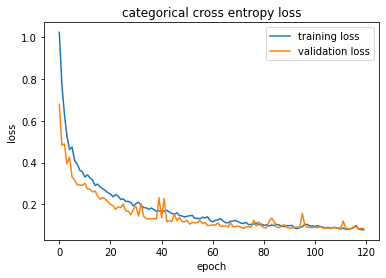

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('categorical cross entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right' )
plt.show()

In [ ]:
# Using relu activation function
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train.shape[1], activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

sgd = SGD(lr = .13, momentum = .9, decay = 4e-3)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train.values, oh_training_labels, epochs = 120, batch_size = 50, verbose = 2,
          validation_split = .15, shuffle=True)

Epoch 1/120
125/125 - 1s - loss: 1.2565 - accuracy: 0.3471 - val_loss: 1.0708 - val_accuracy: 0.4180
Epoch 2/120
125/125 - 0s - loss: 1.0830 - accuracy: 0.4076 - val_loss: 0.9138 - val_accuracy: 0.4651
Epoch 3/120
125/125 - 0s - loss: 0.8671 - accuracy: 0.5393 - val_loss: 0.5921 - val_accuracy: 0.6491
Epoch 4/120
125/125 - 0s - loss: 0.6710 - accuracy: 0.6327 - val_loss: 0.5409 - val_accuracy: 0.6600
Epoch 5/120
125/125 - 0s - loss: 0.6496 - accuracy: 0.6350 - val_loss: 0.5423 - val_accuracy: 0.6591
Epoch 6/120
125/125 - 0s - loss: 0.6591 - accuracy: 0.6358 - val_loss: 0.5171 - val_accuracy: 0.6682
Epoch 7/120
125/125 - 0s - loss: 0.5947 - accuracy: 0.6548 - val_loss: 0.5034 - val_accuracy: 0.6854
Epoch 8/120
125/125 - 0s - loss: 0.5647 - accuracy: 0.6596 - val_loss: 0.4947 - val_accuracy: 0.6691
Epoch 9/120
125/125 - 0s - loss: 0.5686 - accuracy: 0.6604 - val_loss: 0.4936 - val_accuracy: 0.6700
Epoch 10/120
125/125 - 0s - loss: 0.5450 - accuracy: 0.6812 - val_loss: 0.5006 - val_accura

In [ ]:
nn_test_score = model.evaluate(test.values, oh_testing_labels, verbose=2)
print("Neural Network accuracy of {} on the test set".format(nn_test_score[1]))

93/93 - 0s - loss: 0.1654 - accuracy: 0.9569
Neural Network accuracy of 0.9569053053855896 on the test set


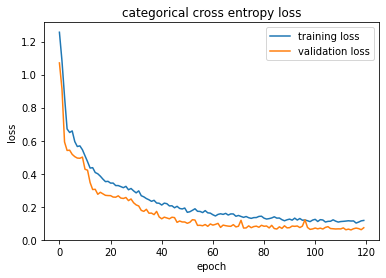

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('categorical cross entropy loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc = 'upper right' )
plt.show()

In [ ]:
# Using relu activation function
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train.shape[1], activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

sgd = SGD(lr = .001, momentum = .9, decay = 4e-3)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train.values, oh_training_labels, epochs = 120, batch_size = 50, verbose = 2,
          validation_split = .15, shuffle=True)

Epoch 1/120
125/125 - 1s - loss: 1.5786 - accuracy: 0.3175 - val_loss: 1.1852 - val_accuracy: 0.5539
Epoch 2/120
125/125 - 0s - loss: 1.2196 - accuracy: 0.4695 - val_loss: 0.9724 - val_accuracy: 0.7353
Epoch 3/120
125/125 - 0s - loss: 1.0591 - accuracy: 0.5430 - val_loss: 0.8561 - val_accuracy: 0.7425
Epoch 4/120
125/125 - 0s - loss: 0.9459 - accuracy: 0.5987 - val_loss: 0.7425 - val_accuracy: 0.7724
Epoch 5/120
125/125 - 0s - loss: 0.8835 - accuracy: 0.6207 - val_loss: 0.6609 - val_accuracy: 0.8051
Epoch 6/120
125/125 - 0s - loss: 0.8167 - accuracy: 0.6476 - val_loss: 0.6021 - val_accuracy: 0.8123
Epoch 7/120
125/125 - 0s - loss: 0.7744 - accuracy: 0.6740 - val_loss: 0.5567 - val_accuracy: 0.8114
Epoch 8/120
125/125 - 0s - loss: 0.7362 - accuracy: 0.6931 - val_loss: 0.5282 - val_accuracy: 0.8005
Epoch 9/120
125/125 - 0s - loss: 0.7030 - accuracy: 0.7014 - val_loss: 0.5020 - val_accuracy: 0.8015
Epoch 10/120
125/125 - 0s - loss: 0.6704 - accuracy: 0.7145 - val_loss: 0.4782 - val_accura

In [ ]:
nn_test_score = model.evaluate(test.values, oh_testing_labels, verbose=2)
print("Neural Network accuracy of {} on the test set".format(nn_test_score[1]))

93/93 - 0s - loss: 0.3175 - accuracy: 0.8704
Neural Network accuracy of 0.8703766465187073 on the test set


In [ ]:
# Using relu activation function
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Build a network for this classification task
model = Sequential()
model.add(Dense(96, input_dim = train.shape[1], activation = 'tanh'))
model.add(Dropout(0.5))
model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(24, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))

sgd = SGD(lr = .1, momentum = .9, decay = 4e-3)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train.values, oh_training_labels, epochs = 120, batch_size = 50, verbose = 2,
          validation_split = .15, shuffle=True)

Epoch 1/120
125/125 - 1s - loss: 1.2425 - accuracy: 0.3671 - val_loss: 1.0319 - val_accuracy: 0.4687
Epoch 2/120
125/125 - 0s - loss: 0.8623 - accuracy: 0.5522 - val_loss: 0.5880 - val_accuracy: 0.6301
Epoch 3/120
125/125 - 0s - loss: 0.7129 - accuracy: 0.6067 - val_loss: 0.5572 - val_accuracy: 0.6256
Epoch 4/120
125/125 - 0s - loss: 0.6383 - accuracy: 0.6303 - val_loss: 0.5070 - val_accuracy: 0.6618
Epoch 5/120
125/125 - 0s - loss: 0.6141 - accuracy: 0.6342 - val_loss: 0.5066 - val_accuracy: 0.6519
Epoch 6/120
125/125 - 0s - loss: 0.5625 - accuracy: 0.6563 - val_loss: 0.5208 - val_accuracy: 0.6664
Epoch 7/120
125/125 - 0s - loss: 0.5448 - accuracy: 0.6683 - val_loss: 0.4630 - val_accuracy: 0.7316
Epoch 8/120
125/125 - 0s - loss: 0.5084 - accuracy: 0.6968 - val_loss: 0.3891 - val_accuracy: 0.7842
Epoch 9/120
125/125 - 0s - loss: 0.4640 - accuracy: 0.7408 - val_loss: 0.3364 - val_accuracy: 0.8105
Epoch 10/120
125/125 - 0s - loss: 0.4158 - accuracy: 0.7702 - val_loss: 0.3596 - val_accura